In [1]:
import yfinance as yf
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [2]:
companys=pd.read_excel('data_final.xlsx')
symbols=list(companys['symbol'])

# Histogramas

In [3]:
def histograma(sim):
    def rendimiento(comp): return np.diff(np.log(comp))
    df_close=np.array(yf.download(sim,start='2019-06-01',progress=0).Close)
    list_rendimiento=rendimiento(df_close)
    data=list_rendimiento
    minimo=min(data)
    maximo=max(data)
    x=np.array(list(np.linspace(minimo,0,7))+list(np.linspace(0,maximo,7)[1:]))
    y=[sum((x[i]<=data) & (data<x[i+1])) for i in range(len(x)-1)]+[sum(data>x[-1])]
    plt.title(sim)
    plt.hist(data,bins=15)
    plt.plot(x,y)
    plt.show()

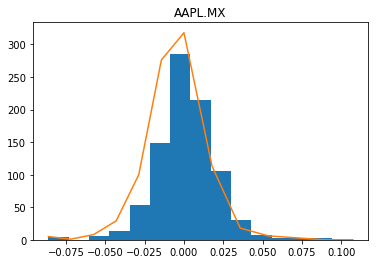

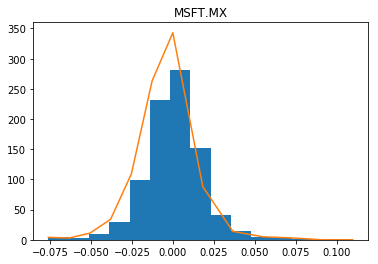

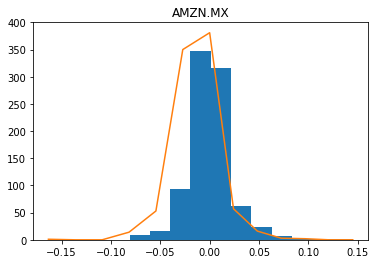

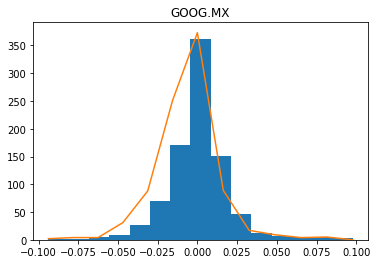

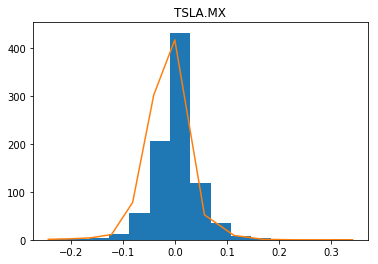

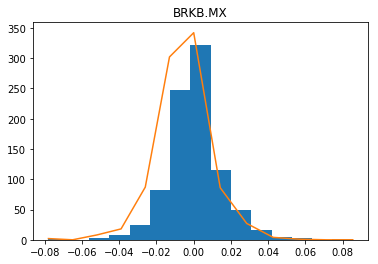

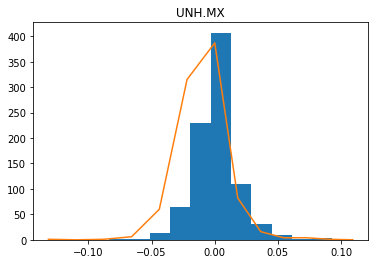

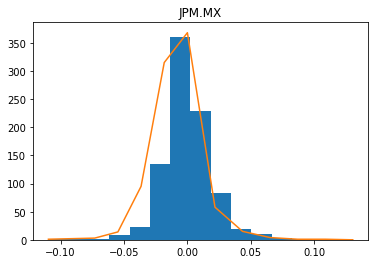

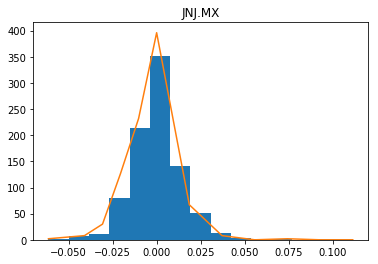

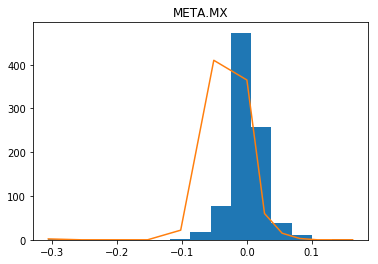

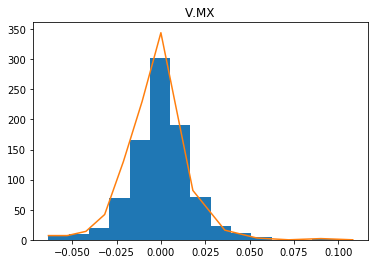

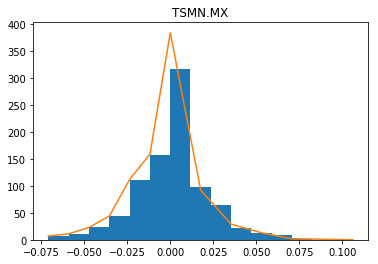

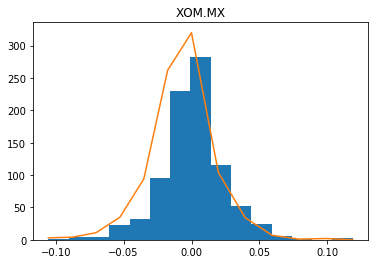

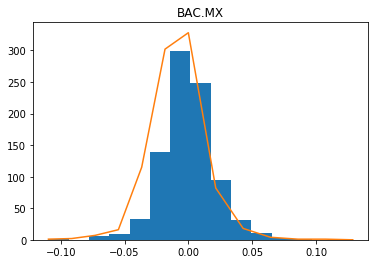

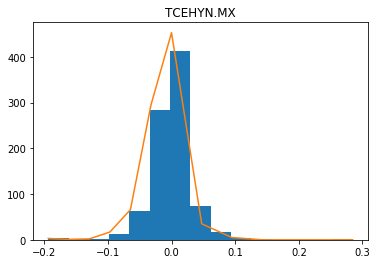

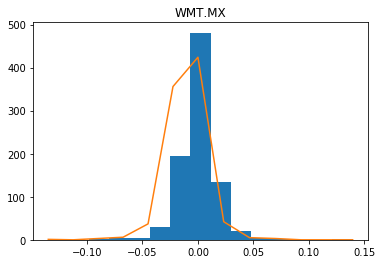

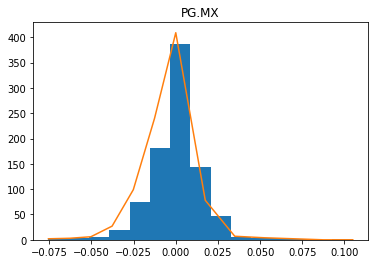

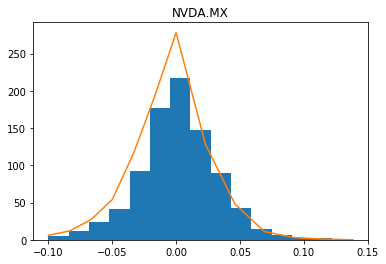

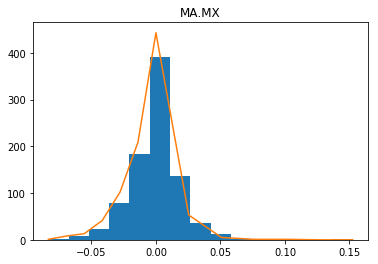

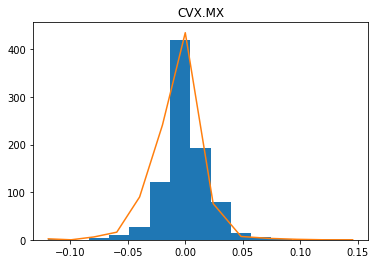

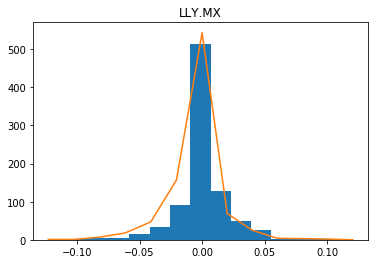

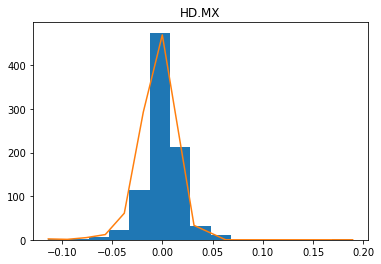

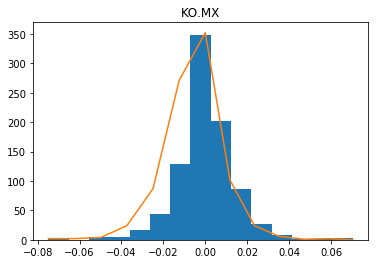

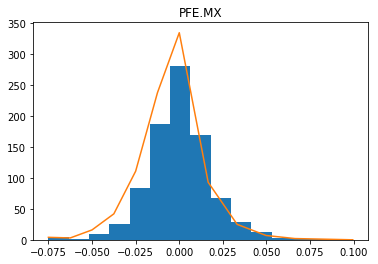

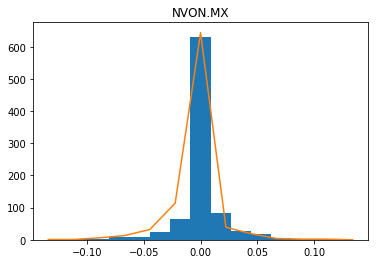

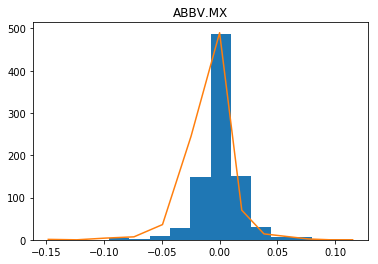

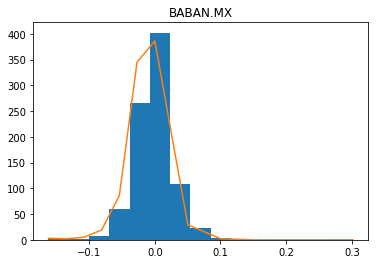

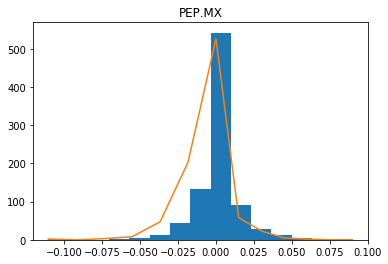

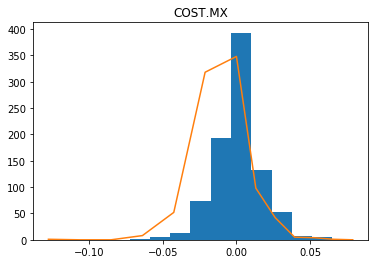

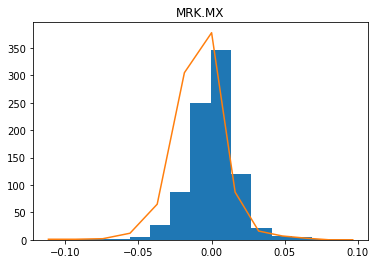

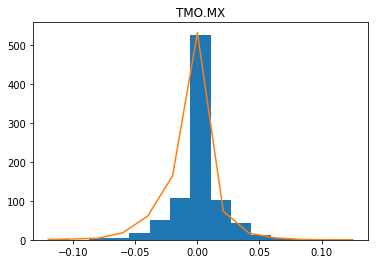

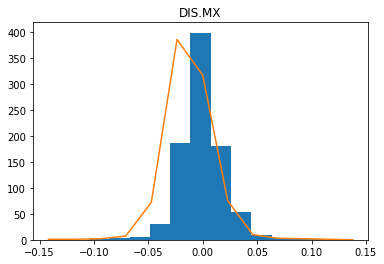

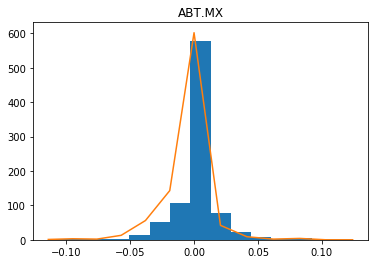

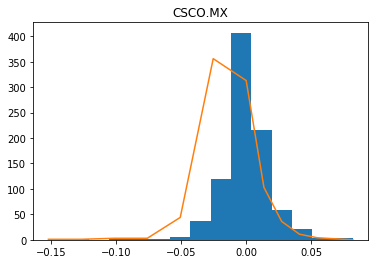

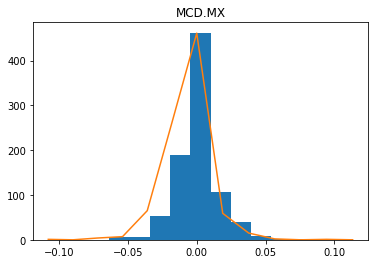

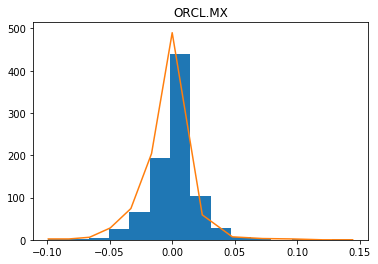

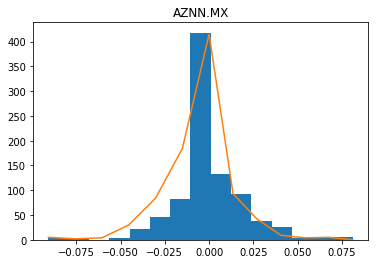

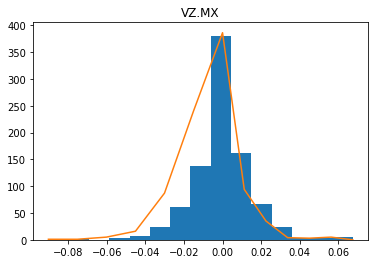

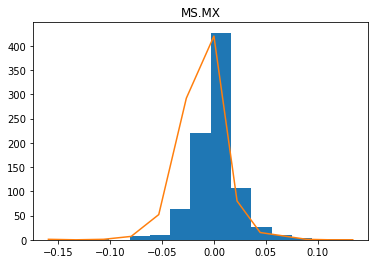

ValueError: max must be larger than min in range parameter.

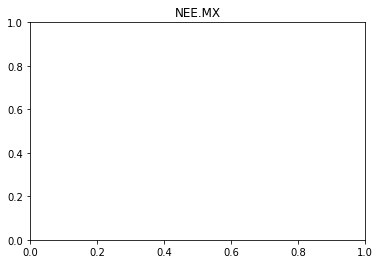

In [4]:
for sym in symbols:
    histograma(sym)

# Pruebas de Hipotesis

In [6]:
from scipy.stats import kstest
from scipy import stats

In [7]:
def rendimiento_symbol(symbol):
    data=yf.download(symbol,start='2018-01-01',progress=0).Close
    return np.diff(np.log(data))

In [8]:
rendimientos={}
for sim in symbols:
    rendimientos[sim]=rendimiento_symbol(sim)

In [29]:
def test(Rendi,pvalue=0.1):
    mu=np.mean(Rendi)
    sigma=np.var(Rendi)
    m=np.exp(mu+sigma/2)**2
    v=np.exp(2*mu+sigma)*(np.exp(sigma)-1)
    s=np.sqrt(abs(np.log(v/(m+1))))
    return np.array([
            kstest(Rendi, 'norm')[1], #prueba si es una normal
            kstest(Rendi,(1.25, 0.5), 'norminvgauss')[1], #prueba si es una normal inversa
            kstest(Rendi,(s,),'lognorm')[1], #prueba si es una log normal
            kstest(Rendi,'anglit')[1], #anglit
            kstest(Rendi,(2.74,),'t')[1], #t
            kstest(Rendi,(1,),'chi2')[1], #chi1
            kstest(Rendi,'cauchy')[1], #cauchy
            kstest(Rendi,(np.mean(Rendi),),'poisson')[1] #poisson
              ])>pvalue


In [30]:
pruebas_hipotesis={}

In [31]:
for sim in symbols:
    pruebas_hipotesis[sim]=test(rendimientos[sim])

In [32]:
pruebas_hipotesis

{'AAPL.MX': array([False, False, False, False, False, False, False,  True]),
 'MSFT.MX': array([False, False, False, False, False, False, False,  True]),
 'AMZN.MX': array([False, False, False, False, False, False, False,  True]),
 'GOOG.MX': array([False, False, False, False, False, False, False,  True]),
 'TSLA.MX': array([False, False, False, False, False, False, False,  True]),
 'BRKB.MX': array([False, False, False, False, False, False, False,  True]),
 'UNH.MX': array([False, False, False, False, False, False, False,  True]),
 'JPM.MX': array([False, False, False, False, False, False, False,  True]),
 'JNJ.MX': array([False, False, False, False, False, False, False,  True]),
 'META.MX': array([False, False, False, False, False, False, False,  True]),
 'V.MX': array([False, False, False, False, False, False, False,  True]),
 'TSMN.MX': array([False, False, False, False, False, False, False,  True]),
 'XOM.MX': array([False, False, False, False, False, False, False,  True]),
 'BAC.

In [13]:
data=yf.download('AAPL.MX',progress=0).Close
rend_appl=np.diff(np.log(data))


In [14]:
test(rend_appl)

C:\Users\leona\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


array([False, False, False, False, False, False, False,  True])

In [15]:
appl=rendimientos['AAPL.MX']

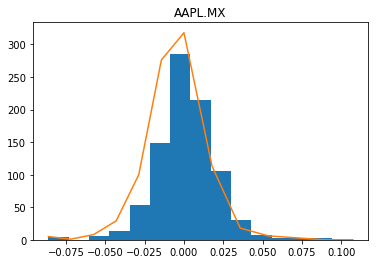

In [16]:
histograma('AAPL.MX')

In [17]:
kstest(appl,(3.57,),'alpha')

KstestResult(statistic=1.0, pvalue=0.0016220600162205612)

In [18]:
kstest(appl,'anglit')[1]

2.262930414607186e-220

In [19]:
a, b = 2.31, 0.627
kstest(appl,(a,b),'beta')

KstestResult(statistic=1.0, pvalue=2.628946541682886e-06)

In [20]:
kstest(appl,(a,b),'burr')

KstestResult(statistic=1.0, pvalue=2.628946541682886e-06)

In [21]:
kstest(appl,'cauchy')

KstestResult(statistic=0.4753045137012646, pvalue=3.7089107731393175e-256)

In [22]:
kstest(appl,(1,),'chi2')

KstestResult(statistic=1.0, pvalue=0.0016220600162205612)

In [33]:
# list(dir(stats.distributions))

In [24]:
kstest(appl,(2.74,),'t')

KstestResult(statistic=1.0, pvalue=0.0016220600162205612)

In [25]:
kstest(appl,(np.mean(appl),),'poisson')

KstestResult(statistic=0.5064935064935064, pvalue=0.9878345498783455)

In [26]:
# kstest(appl,'loggamma')

In [27]:
stats.distributions.l(appl).b

AttributeError: module 'scipy.stats.distributions' has no attribute 'l'

In [36]:
help(stats.distributions.norminvgauss)

Help on norminvgauss_gen in module scipy.stats._continuous_distns object:

class norminvgauss_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  norminvgauss_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A Normal Inverse Gaussian continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norminvgauss` is:
 |  
 |  .. math::
 |  
 |      f(x, a, b) = \frac{a \, K_1(a \sqrt{1 + x^2})}{\pi \sqrt{1 + x^2}} \,
 |                   \exp(\sqrt{a^2 - b^2} + b x)
 |  
 |  where :math:`x` is a real number, the parameter :math:`a` is the tail
 |  heaviness and :math:`b` is the asymmetry parameter satisfying
 |  :math:`a > 0` and :math:`|b| <= a`.
 |  :math:`K_1` is the modified Bessel function of second kind
 |  (`scipy.special.k1`).
 |  
 |  %(after_notes)s
 |  
 |  A normal inverse Gaussian random variable `Y` with parameters `a` and `b`
 |  c

In [40]:
help(stats.cauchy)

Help on cauchy_gen in module scipy.stats._continuous_distns object:

class cauchy_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  cauchy_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A Cauchy continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `cauchy` is
 |  
 |  .. math::
 |  
 |      f(x) = \frac{1}{\pi (1 + x^2)}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      cauchy_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_continuous:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=No